In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

In [2]:
DEVICE = 'cuda:0'
zdim = 2

In [3]:
def model(params, sigma = .1):
    z = np.array(list(params.values()))
    z = z * np.pi
    x = np.sin(z)**2
    return dict(x=x)

In [4]:
def noise(obs, params, sigma = 0.1):
    x = obs['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [5]:
params = ["z"+str(i) for i in range(zdim)]
par0 = {k: 0.25 for k in params}
obs0 = noise(model(par0), par0)

In [6]:
cache = swyft.MemoryCache(params, obs_shapes = dict(x=(zdim,)))
prior_conf = {k: ["uniform", 0., 1.] for k in params}
prior = swyft.Prior(prior_conf)

Creating new cache.


In [8]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
s.infer2d(N = 300, params = ['z0', 'z1'])

N = 300
Round: 1
No new simulator runs required.
No simulations required.
n_features = 2
Start training
LR iteration 0
Validation loss: 0.0
Validation loss: 0.0
Total epochs: 2
LR iteration 1
Validation loss: 0.0
Validation loss: 0.0
Total epochs: 2
LR iteration 2
Validation loss: 0.0
Validation loss: 0.0
Total epochs: 2


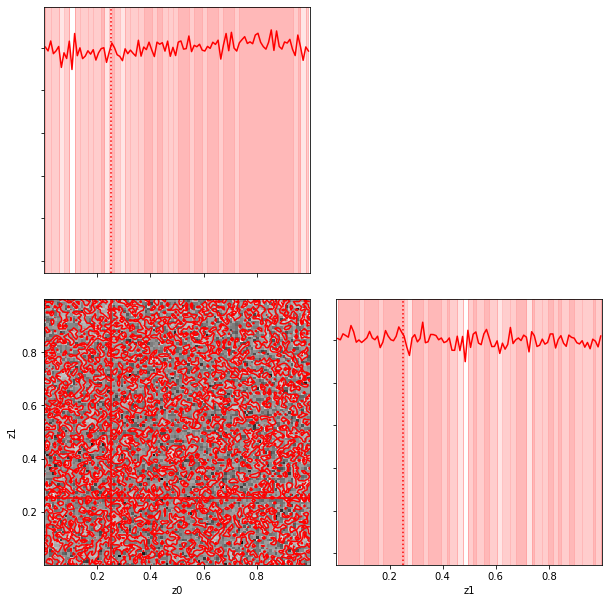

In [18]:
post = s.posteriors(n_samples = 100000)
swyft.corner(post, ["z0", "z1"], color='r', figsize = (10,10), truth=par0)

In [19]:
sd = s.state_dict()

AttributeError: 'SWYFT' object has no attribute 'state_dict'

In [20]:
s.from_state_dict(sd, model)

AttributeError: 'SWYFT' object has no attribute 'from_state_dict'